# Московский полумарафон "Лужники", 13 августа 2017

by [Sergey Bronnikov](https://bronevichok.ru/), BSD license
![OpenBSD logo](http://moscowmarathon.org/static/img/home/marathon/logo-luzhniki.png?1)

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import json
import itertools
import collections
import numpy
import re
import datetime
import arrow
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,3)
plt.show(block=True)
%matplotlib inline

## Мужчины

In [2]:
mens = json.load(open('data/20170813_luzhniki_hm_m_21_1km.json')) # все зарегистрированные
male = [runner for runner in mens['data'] if runner[9] != "DQ"] # только финишеры
print repr([(runner[1], runner[2], runner[3], runner[4]) for runner in male[:5]]).decode('unicode_escape')

[(1, 6351, u'Grigorev', u'Oleg'), (2, 6905, u'Сафронов', u'Андрей'), (3, 6023, u'Логинов', u'Виталий'), (4, 4231, u'Барышников', u'Андрей'), (5, 3551, u'Щукин', u'Владислав')]


In [3]:
print "Лучшее время у мужчин: ", male[0][9]
print "Худшее время у мужчин: ", male[-1][9]
print "Всего финишировавших мужчин: ", len(male)

Лучшее время у мужчин:  1:09:17
Худшее время у мужчин:  3:16:52
Всего финишировавших мужчин:  3910


### Рейтинг беговых клубов по количеству представленных мужчин

In [42]:
male_teams = lambda: (([runner[8], runner[7]]) for runner in male)

dfmt = pd.DataFrame(male_teams(), columns=['team', 'city'])
dfmt.replace([u'I LOVE RUNNING', u'I love running', u'I Love Running', u'ILR', u'ILOVERUNNING', u'ILOVERUNNING', u'iloverunning', u'Iloverunning'], u'I Love Running', inplace=True)
dfmt.replace([u'Academy marathon', u'Academy of marathon', u'Academy Marathon', u'Академия марафона', u'Академия Марафонского Бега'], u'Академия Марафона', inplace=True) 
dfmt.replace([u'ЦиклON', u'Циклон'], u'ЦиклОн', inplace=True)
dfmt.replace([u'Gepard', u'GEPARD'], u'GEPARD', inplace=True)
dfmt.replace([u'RunLab/AFRC', u'RUNLABclub', u'RUNLAB CLUB', u'RunLab Club'], u'RunLab Club', inplace=True)
dfmt.replace([u'adidas runners', u'adidas runners AR Нагорныйсила', u'Adidas Runners', u'Adidas', u'ADIDAS RUNNERS', u'Adidas RunClub', u'ADIDAS RUNNERS MOSCOW', u'Adidas Runclub Fili', u'Adidas Runners Ivanovo', u'Adidas runners', u'Adidas runnes club Mitino', u'Adidas RunClub Sokolniki', u'Adidas Run Club Izmailovo', u'Adidas run club Kirov', u'runess club adidas тушино', u'Adidas Runners Университет', u'Adidas Runners Atrium', u'ADIDAS RUNNERS ULTRA', u'adidas Runners', u'ADIDAS RUNCLUB> ЛОСИНЫЙ', u'AR Ekaterinburg'], u'Adidas Runners', inplace=True) 
result = dfmt.groupby('team').aggregate(len)
#result = dfmt.groupby('team').size()
result.sort_values(result.columns[0], ascending=[1], inplace=True)
#result.loc[result['city'] > 5]
result.tail(31)
#result.plot.bar(stacked=False);
# игнорировать команды: нет, Нет, 0, Лично, лично

,city
team,
Лично,5
Moskva River Runners,5
Академия Марафона,5
ABST,5
IRC,5
КЛЭБ,5
БиМ,5
RunLab Club,5
RunLepraRun,5


### Рейтинг беговых клубов по количеству мужчин из первой сотни финишеров

In [5]:
rating = dfmt.head(100)
rating100 = rating.groupby('team').aggregate(len)
rating100.sort_values(rating100.columns[0], ascending=[1], inplace=True)
rating100
# игнорировать команды: нет, Нет, 0, Лично, лично

,city
team,
VALLENA,1
Wake and run,1
You Can Run Minsk,1
Айвика,1
Аматар,1
БиМ,1
ДЮСШ Витязь,1
Динамо,1
ЗАЙКА,1


### Рейтинг городов по количеству спортсменов

In [17]:
male_city = lambda: (([runner[8], runner[7]]) for runner in male)
dfmc = pd.DataFrame(male_city(), columns=['team', 'city'])
cities = dfmc.groupby('city').aggregate(len)
cities.sort_values(cities.columns[0], ascending=[1], inplace=True)
cities.tail(20)

,team
city,
Щёлково,9
РЕУТОВ,10
Королев,11
Тверь,11
Воронеж,11
ДОЛГОПРУДНЫЙ,11
ЖУКОВСКИЙ,11
Подольск,13
Тула,13


### Рейтинг стран по количеству спортсменов

In [118]:
male_country = lambda: (([runner[8], runner[6]]) for runner in male)

dfmco = pd.DataFrame(male_country(), columns=['team', 'country'])
countries = dfmco.groupby('country').aggregate(len)
countries.sort_values(countries.columns[0], ascending=[1], inplace=True)
countries.tail(9) # все страны с более, чем одним участником

,team
country,
Latvia,2
Uzbekistan,2
Germany,2
Colombia,2
Netherlands,3
Ukraine,5
China,6
Belarus,12
Russia,3854


### Распределение спортсменов по времени преодоления дистанции

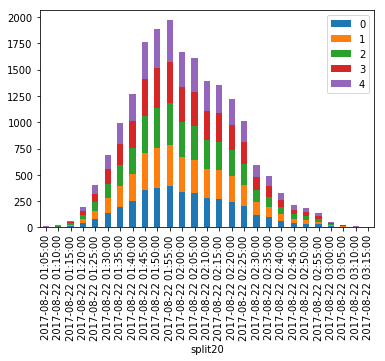

In [114]:
male_finishers = lambda: (([runner[7], runner[9]]) for runner in male)
male_split5 = lambda: (([runner[7], runner[11]]) for runner in male)
male_split10 = lambda: (([runner[7], runner[12]]) for runner in male)
male_split15 = lambda: (([runner[7], runner[13]]) for runner in male)
male_split20 = lambda: (([runner[7], runner[14]]) for runner in male)

finish_time = pd.DataFrame(male_finishers(), columns=['city', 'time'])
split5 = pd.DataFrame(male_finishers(), columns=['city', 'split5'])
split10 = pd.DataFrame(male_finishers(), columns=['city', 'split10'])
split15 = pd.DataFrame(male_finishers(), columns=['city', 'split15'])
split20 = pd.DataFrame(male_finishers(), columns=['city', 'split20'])

# https://stackoverflow.com/questions/36914892/python-how-to-group-pandas-data-frame-in-a-certain-time-window
finish_time['time'] = pd.to_datetime(finish_time['time'])
split5['split5'] = pd.to_datetime(split5['split5'])
split10['split10'] = pd.to_datetime(split10['split10'])
split15['split15'] = pd.to_datetime(split15['split15'])
split20['split20'] = pd.to_datetime(split20['split20'])

finish_time = finish_time.set_index(['time'])
split5 = split5.set_index(['split5'])
split10 = split10.set_index(['split10'])
split15 = split15.set_index(['split15'])
split20 = split20.set_index(['split20'])

period = '5Min'
result_finish = finish_time.groupby([pd.TimeGrouper(period)]).aggregate(len)
result_split5 = split5.groupby([pd.TimeGrouper(period)]).aggregate(len)
result_split10 = split10.groupby([pd.TimeGrouper(period)]).aggregate(len)
result_split15 = split15.groupby([pd.TimeGrouper(period)]).aggregate(len)
result_split20 = split20.groupby([pd.TimeGrouper(period)]).aggregate(len)

result = pd.concat([result_finish, result_split5, result_split10, result_split15, result_split20], keys=['finish_time', 'split5', 'split10', 'split15', 'split20'], axis=1, ignore_index=True)
result.plot.bar(stacked=True);

## Женщины

In [9]:
womans = json.load(open('data/20170813_luzhniki_hm_f_21_1km.json'))
female = [runner for runner in womans['data'] if runner[9] != "DQ"]

print repr([(runner[3], runner[4]) for runner in female[:5]]).decode('unicode_escape')

[(u'Конякина', u'Юлия'), (u'Попкова', u'Наталья'), (u'Сидорова', u'Алла'), (u'Чудайкина', u'Дарья'), (u'Тарантинова', u'Ольга')]


In [10]:
print "Лучшее время у женщин: ", female[0][9]
print "Худшее время у женщин: ", female[-1][9]
print "Всего финишировавших женщин: ", len(female)

Лучшее время у женщин:  1:18:00
Худшее время у женщин:  3:08:22
Всего финишировавших женщин:  1612


In [67]:
female_teams = lambda: (
    ((runner[8], runner[7]) for runner in male))

dfft = pd.DataFrame(female_teams(), columns=['team', 'city'])
dfft = dfmt.groupby('team').aggregate(len)
result = dfft.sort_values(['city'], ascending=[1])
result.tail(1000)

,city
team,
The Green Lobby,1
Апрелевка,1
Арифметика Добра,1
Арт Механика,1
Ассоциация,1
Астерос,1
Атлетишко из Бильбао,1
Аэробия,1
БЕГЛЕЦЫ,1


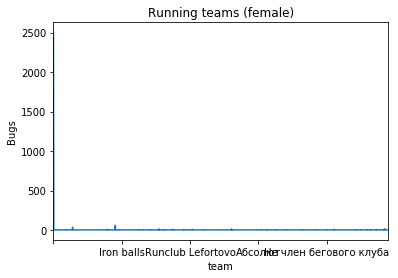

In [12]:
pft = dfft.plot(legend=False)
pft.set_title('Running teams (female)')
pft.set_ylabel('Bugs')

## Общие данные

In [13]:
total = female + male
print "Всего финишировавших участников: ", len(total)

min = 100
max = 0
imin = []
imax = []
index = 0
for runner in total:
    if min >= runner[5]:
        min = runner[5]
        imin = index
        
    if max < runner[5]:
        max = runner[5]
        imax = index
    index = index + 1

print "Самый молодой участник", min, repr(total[imin]).decode('unicode_escape')
print "Самый старый участник", max, repr(total[imax]).decode('unicode_escape')

Всего финишировавших участников:  5522
Самый молодой участник 18 [3029, 3808, 5414, u'Егоршев', u'Иван', 18, u'Russia', u'Москва', u'', u'2:19:31', u'10:10:00', u'0:25:27', u'0:56:42', u'1:32:34', u'2:11:46']
Самый старый участник 82 [2839, 3509, 488, u'Новиков', u'Владимр', 82, u'Russia', u'ФРЯЗИНО', u'Спутник', u'2:15:46', u'10:10:00', u'0:30:21', u'1:02:38', u'1:35:41', u'2:08:39']


### TODO

- распределение по времени преодоления дистанции
- общее количество городов и количество участников из каждого города
- общее количество стран и количество участников из каждой страны
- средний пейс на каждом сплите (где больше всего скорость падала?)
- карта с городами-участниками
- распределение возрастов спортсменов-участников
- ~~~распределение по клубам первой сотни бегунов~~
- ~~~общее количество беговых клубов и количество участников из каждого клуба~~~
- [Визуализация Московского марафона 2016](http://moscowmarathon.org/ru/moscowmarathon/2016/race-results/visualization/) и [рассказ](http://newrunners.ru/mag/pryamaya-rech-tatyana-bibikova-o-vizualizacii-mara/)
- [Визуализация марафона Белые ночи 2014](http://white-nights.datalaboratory.ru/)